- [blog](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac)
- [notebook](https://github.com/martinpella/logistic-reg/blob/master/logistic_reg.ipynb)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

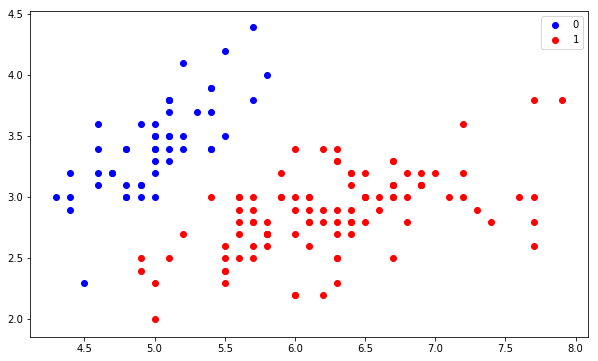

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [21]:
class LogisticRegression:
    def __init__(self,lr:float=0.01, 
                 num_iter:int=100000, 
                 fit_intercept:bool=True, 
                 verbose:bool=False, threshold:float=0.5):
        self.lr = lr
        self.niter = num_iter
        self.verbose = verbose
        self.threshold = threshold
        self.fit_intercept = fit_intercept
        self.ls_loss = []
    
    # protected method
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def loss(self, yhat, y):
        return -(y*np.log(yhat)+(1-y)*np.log(1-yhat)).mean()
    
    def loss_grad(self, X, yhat, y):
        return np.dot(X.T,(yhat-y))/y.shape[0]
    
    def fit(self, X, y):
        
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.niter):
            
            z = np.dot(X, self.theta)
            yhat = self.sigmoid(z)
            grad = self.loss_grad(X, yhat, y)
            self.theta -= self.lr*grad
            
            
            loss_val = self.loss(self.sigmoid(np.dot(X, self.theta)),y)
            self.ls_loss.append(loss_val)
            
            if(self.verbose ==True and i % 10000 == 0):
                print(f'[{i}/{self.niter}] \t loss: {loss_val:.4}')
            
     
    def get_loss(self):return self.ls_loss
    
    #     def pred_proba(self, X):
    #         return self.sigmoid(np.dot(X, self.theta))
    
    def pred_proba(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.pred_proba(X).round() #>= self.threshold
    

In [22]:
model = LogisticRegression(lr=0.1, num_iter=300000, verbose=True)

In [23]:
# %time 
model.fit(X, y)

[0/300000] 	 loss: 0.6107
[10000/300000] 	 loss: 0.03433
[20000/300000] 	 loss: 0.02879
[30000/300000] 	 loss: 0.02572
[40000/300000] 	 loss: 0.02341
[50000/300000] 	 loss: 0.02151
[60000/300000] 	 loss: 0.01989
[70000/300000] 	 loss: 0.0185
[80000/300000] 	 loss: 0.0173
[90000/300000] 	 loss: 0.01625
[100000/300000] 	 loss: 0.01533
[110000/300000] 	 loss: 0.01452
[120000/300000] 	 loss: 0.0138
[130000/300000] 	 loss: 0.01316
[140000/300000] 	 loss: 0.01258
[150000/300000] 	 loss: 0.01206
[160000/300000] 	 loss: 0.01159
[170000/300000] 	 loss: 0.01116
[180000/300000] 	 loss: 0.01077
[190000/300000] 	 loss: 0.01041
[200000/300000] 	 loss: 0.01008
[210000/300000] 	 loss: 0.009768
[220000/300000] 	 loss: 0.009482
[230000/300000] 	 loss: 0.009215
[240000/300000] 	 loss: 0.008965
[250000/300000] 	 loss: 0.008731
[260000/300000] 	 loss: 0.008512
[270000/300000] 	 loss: 0.008305
[280000/300000] 	 loss: 0.00811
[290000/300000] 	 loss: 0.007925


In [24]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [25]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

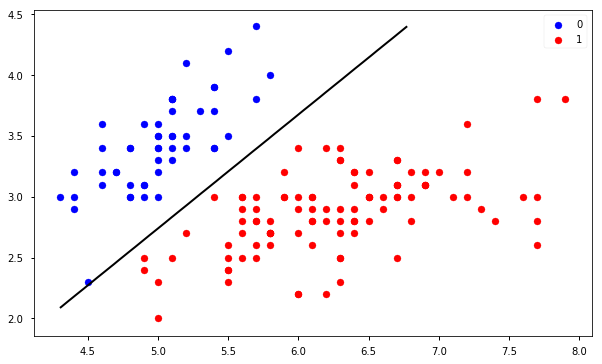

In [31]:
with plt.style.context('seaborn-notebook'):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend()
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = model.pred_proba(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    plt.show()